### Tutorial 3: Hypothesis Testing

Hypothesis testing is a statistical method used to make inferences or draw conclusions about a population based on sample data. It is commonly used in various fields, including social sciences, business, medicine, and more. The process involves testing a claim or hypothesis about a population parameter.

![population vs. sample](pop_sample.png)
---

#### What is Hypothesis Testing?

Hypothesis testing allows us to test whether there is enough evidence in a sample of data to support a particular belief or hypothesis about the population.

A **hypothesis** is a statement or assumption about a population parameter (such as the mean, proportion, or variance). 

In hypothesis testing, you typically have two competing hypotheses:
- **Null Hypothesis (H₀)**: The default assumption, stating that there is no effect or no difference.
- **Alternative Hypothesis (H₁ or Ha)**: The hypothesis you are trying to prove, stating that there is an effect or a difference.

---

#### Steps in Hypothesis Testing

**Data Screening and Outliers**
- visually inspect the data
- Find extreme samples, and check them carefully.
- Determine the data-type of the values.

**Normality Check**
- Parametirc Tests: Assume that the data can be well described by a distribution
- Nonparametric Test: do not depend on the data following a specific distribution. 


| **Step** | **Description** |
|----------|-----------------|
| **Take Random Sample** | A random sample is drawn from a population.|
| **1. State the Hypotheses** | - **Null Hypothesis (H₀)**: The default assumption, stating no effect or difference. <br> - **Alternative Hypothesis (H₁ or Ha)**: The hypothesis you want to test, stating there is an effect or difference. |
| **2. Set the Significance Level (α)** | The significance level (α) represents the probability of rejecting the null hypothesis when it is actually true. Common values are: <br> - α = 0.05 (5%) <br> - α = 0.01 (1%) <br> - α = 0.10 (10%) |
| **3. Choose the Type of Test** | The type of hypothesis test depends on the data and the hypothesis: <br> - **Z-Test**: Large sample or known population variance. <br> - **T-Test**: Small sample with unknown variance. <br> - **Chi-Square Test**: Categorical data. <br> - **ANOVA**: Comparing means across three or more groups. |
| **4. Compute the Test Statistic** | Calculate the test statistic (e.g., z-statistic or t-statistic) based on your sample data. This statistic quantifies how much the sample data deviate from the null hypothesis. |
| **5. Determine the P-Value or Critical Value** | - **P-Value**: The probability of obtaining the test statistic at least as extreme as the one calculated, assuming H₀ is true. <br> - **Critical Value**: A threshold value to help decide whether to reject H₀. |
| **6. Make a Decision** | - **Reject H₀** if p-value < α. <br> - **Fail to Reject H₀** if p-value ≥ α. |
| **7. Interpret the Results** | Based on the decision, interpret the results in the context of the research question. |

---

#### Types of Hypothesis Tests

##### One-Tailed vs Two-Tailed Tests:

- **One-Tailed Test**: Tests if the population parameter is either greater than or less than a certain value (directional hypothesis).
- **Two-Tailed Test**: Tests if the population parameter is different from a certain value (non-directional hypothesis).

**Example 1: One-Tailed Test**
- H₀: μ = 100 (The population mean is 100)
- H₁: μ > 100 (The population mean is greater than 100)

**Example 2: Two-Tailed Test**
- H₀: μ = 100 (The population mean is 100)
- H₁: μ ≠ 100 (The population mean is not equal to 100)

---

#### Common Mistakes in Hypothesis Testing

- **Type I Error (False Positive)**: Rejecting the null hypothesis when it is actually true. The probability of making a Type I error is α (the significance level).
- **Type II Error (False Negative)**: Failing to reject the null hypothesis when it is actually false. The probability of making a Type II error is denoted as β.
- **Misinterpreting the p-value**: The p-value is not the probability that H₀ is true. It is the probability of obtaining the observed data (or more extreme data) given that H₀ is true.

---


In [56]:
import sqlite3
import pandas as pd

db_path = './database/mmdt.db3'

conn = sqlite3.connect(db_path)
query = """
        SELECT 
                p.ID, 
                COALESCE(p.Gender, b.Gender) as gender,
                COALESCE(p.BOD, b.BOD) as birth_year,
                COALESCE(p.Pre_Knowledge_Data, b.Pre_Knowledge_Data) as pre_score,
                COALESCE(p.Academic_Career, b.Academic_Career) as academic,
                COALESCE(a.Rate, '0%') as attendance
                FROM participants as p
                LEFT JOIN bhutan as b                
                ON p.ID = b.ID
                LEFT JOIN attendance as a
                ON LOWER(a.ID) = LOWER(p.ID);
        """

df = pd.read_sql_query(query, conn)
conn.close()

gender_map = {"Man": "Male"}

df['attendance'] = df['attendance'].apply(lambda data:data.replace('%',''))
df['attendance'] =  df['attendance'].astype('float64')
df['gender'] = df['gender'].str.strip()
df['gender'] = df['gender'].str.title()
df['gender'] = df['gender'].replace(gender_map)
df_r = df.groupby('gender')['pre_score'].agg(avg='mean', std='std').round(2)
df_r

,avg,std
gender,,
Female,1.67,1.00
Male,1.85,1.03


In [57]:
import matplotlib.pyplot as plt
import scipy.stats as stat


alpha = 0.05
male_scores = df[df['gender']=='Male']['pre_score']
female_scores = df[df['gender']=='Female']['pre_score']

t_stat, p_value = stat.ttest_ind(male_scores, female_scores, equal_var = True)
print(f"t_statistics = {t_stat:.3f}, p_value = {p_value:.3f}")

if p_value < alpha:
    print("There is a significant difference between the two groups (equal variances).")
else:
    print("There is no significant difference between the two groups (equal variances).")


t_statistics = 0.796, p_value = 0.428
There is no significant difference between the two groups (equal variances).



#### Example of Hypothesis Testing

##### Scenario: Compare the pre-knowledge Between Male and Female

We want to test if there is a significant difference in pre-knowledge scores between male and female students.

---

##### Steps for Hypothesis Testing

| **Step** | **Description** | **Values/Example** |
|----------|-----------------|--------------------|
| **1. State the Hypotheses** | - **Null Hypothesis (H₀)**: The average scores of male and female students are the same. <br> - **Alternative Hypothesis (H₁)**: The average scores of male and female students are different. | - **H₀**: μ₁ = μ₂ (Average score of male = Average score of female) <br> - **H₁**: μ₁ ≠ μ₂ (Average score of male ≠ Average score of female) |
| **2. Set the Significance Level (α)** | Choose the significance level for the test. | α = 0.05 (5%) |
| **3. Choose the Test Type** | The appropriate test depends on the data. Since we are comparing two independent groups (male vs female), we use a **two-sample t-test**. | Two-sample t-test |
| **4. Compute the Test Statistic** | Let's assume we have the following data: <br> - Mean score for male students: 1.85 <br> - Mean score for female students: 1.67 <br> - Standard deviation for male students: 1.0 <br> - Standard deviation for female students: 1.02 <br> - Sample size for male students: 27<br> - Sample size for female students: 73 | Test statistic formula: <br> $$ t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $$ |
| **5. Calculate the Test Statistic** | Plugging the values into the formula| Test statistic = 0.786|
| **6. Determine the P-Value** | Use the t-distribution with degrees of freedom (df). For this case, the degrees of freedom is approximately: <br> $$ df = \min(n_1 - 1, n_2 - 1) = \min(73 - 1, 27 - 1) = 26 $$ <br> Using a t-distribution table or calculator, the p-value for t = 0.786 with 26 df is approximately 0.435. | P-value ≈ 0.435 |
| **7. Make a Decision** | - **Reject H₀** if p-value < α. <br> - **Fail to Reject H₀** if p-value ≥ α. | Since p-value (0.435) is greater than α (0.05), we **fail to reject the null hypothesis (H₀)**. |
| **8. Interpret the Results** | Based on the p-value, there is not enough evidence to reject that the average pre-knowledge scores of male and female students are the same. | Conclusion: There is no significant difference in pre-knowledge scores between the groups. |

---

In [58]:
df['academic'] = df['academic'].astype('category')
new_order = ['Class 12 Pass Out', 'Diploma', 'Diploma Graduate', 'Undergraduate Student',
       'Graduate (Degree holder)', 'Not Currently Enrolled', 'Other']
df['academic'] =df['academic'].cat.set_categories(new_categories = new_order, ordered = True)
df_g = df.groupby("academic", observed = True)[['pre_score', 'attendance']].agg(num_stu = ('pre_score','count'), 
                                                                                avg_knowledge = ('pre_score','mean'), avg_attendance = ('attendance','mean'),
                                                                                std_knowledge = ('pre_score','std'), std_attendance = ('attendance','std'))
df_g

,num_stu,avg_knowledge,avg_attendance,std_knowledge,std_attendance
academic,,,,,
Class 12 Pass Out,1,3.000000,0.000000,NaN,NaN
Diploma,1,2.000000,0.000000,NaN,NaN
Diploma Graduate,4,2.250000,79.000000,0.500000,31.696477
Undergraduate Student,19,1.789474,70.736842,0.976328,39.444535
Graduate (Degree holder),69,1.695652,80.826087,1.047467,28.638701
Not Currently Enrolled,5,1.400000,85.000000,0.547723,22.360680
Other,1,0.000000,75.000000,NaN,NaN


---
##### Analysis Focus and Rationale

From the sample data, the majority of participants fall into two categories:  
- **Undergraduate Students**: 19 participants  
- **Graduate (Degree holders)**: 69 participants  

Other categories have very small sample sizes, making them less representative. Thus, the analysis focuses on these two dominant groups, which offer sufficient data for statistical comparison.



##### Normality Check and Insights

- The distributions of **Undergraduate Students** and **Graduate Degree holders** are **negatively skewed**, indicating non-normality.  
- A **non-parametric test**, such as the **Kruskal-Wallis test**, is appropriate to compare the two groups.  


##### Test Selection Remarks

- **Parametric Tests**: Suitable for normal distributions (e.g., t-test).  
- **Non-Parametric Tests**: Used for non-normal data or skewed distributions (e.g., Kruskal-Wallis, Mann-Whitney U).  

This ensures a valid and robust statistical analysis.

---

Undergraduate skewness: -1.03 
 The distribution is negatively skewed (tail is longer on the left side).
Graduate skewness: -1.0 
 The distribution is negatively skewed (tail is longer on the left side).


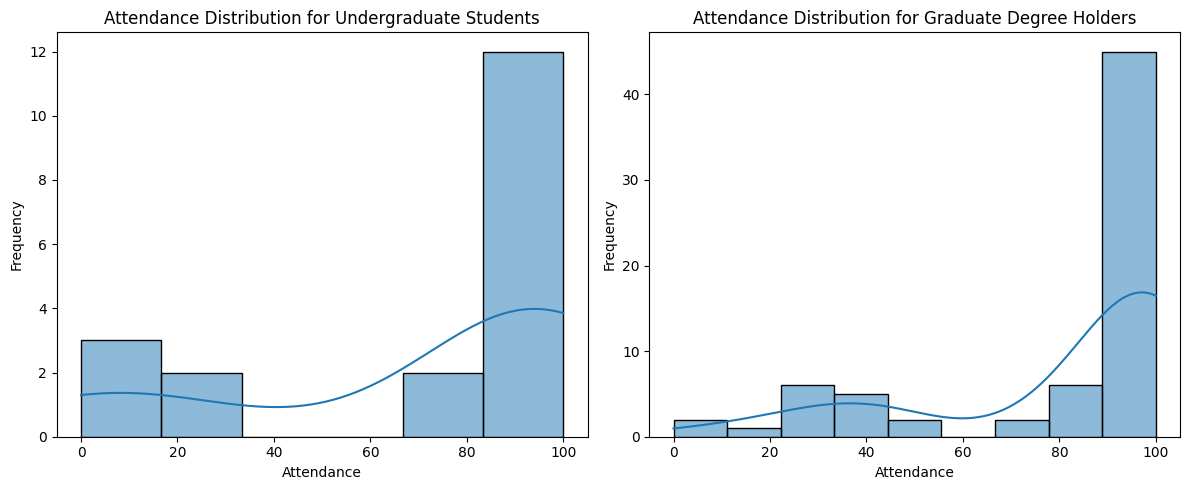

In [59]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Extract data for Undergraduate and Graduate groups
group1_data = df.loc[df['academic'] == "Undergraduate Student", 'attendance']
group2_data = df.loc[df['academic'] == "Graduate (Degree holder)", 'attendance']

# Calculate and print skewness 
grp1_skew = np.round(skew(group1_data),2)
grp2_skew = np.round(skew(group2_data))
if  grp1_skew == 0:
    print(f"Undergraduate skewness: {grp1_skew} \n The distribution is perfectly symmetrical (ideal normal distribution).")
elif grp1_skew>0:
    print(f"Undergraduate skewness: {grp1_skew} \n The distribution is positively skewed (tail is longer on the right side).")
else: 
    print(f"Undergraduate skewness: {grp1_skew} \n The distribution is negatively skewed (tail is longer on the left side).")

if  grp2_skew == 0:
    print(f"Graduate skewness: {grp2_skew} \n The distribution is perfectly symmetrical (ideal normal distribution).")
elif grp1_skew>0:
    print(f"Graduate skewness: {grp2_skew} \n The distribution is positively skewed (tail is longer on the right side).")
else: 
    print(f"Graduate skewness: {grp2_skew} \n The distribution is negatively skewed (tail is longer on the left side).")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 
# Plot histograms for the two groups
sns.histplot(group1_data, kde=True, ax=axes[0])
axes[0].set_title("Attendance Distribution for Undergraduate Students")
axes[0].set_xlabel("Attendance")
axes[0].set_ylabel("Frequency")

sns.histplot(group2_data, kde=True, ax=axes[1])
axes[1].set_title("Attendance Distribution for Graduate Degree Holders")
axes[1].set_xlabel("Attendance")
axes[1].set_ylabel("Frequency")

# Show the plot
plt.tight_layout()
plt.show()


Below code gives the step to check Kruskal. Since the p-value is greater than the significance level, we **fail to reject the null hypothesis**, indicating no significant difference between the two groups.

In [60]:
from scipy.stats import kruskal

group1_data = df.loc[df['academic']=="Undergraduate Student", 'attendance']
group2_data = df.loc[df['academic']=="Graduate (Degree holder)", 'attendance']
stat, p_value = kruskal(group1_data, group2_data)
print(f"t_statistics = {t_stat:.3f}, p_value = {p_value:.3f}")

if p_value < alpha:
    print("There is a significant difference between the two groups.")
else:
    print("There is no significant difference between the two groups.")

t_statistics = 0.796, p_value = 0.173
There is no significant difference between the two groups.


**Extra Exercises:**

- The daily energy intake from 11 healthy women is [5260., 5470., 5640., 6180.,6390., 6515., 6805., 7515., 7515., 8230., 8770.] kJ. Is this value significantly different from the recommended value of 7725?
- In a clinic, 15 lazy patients weigh [76, 101, 66, 72, 88, 82, 79, 73, 76, 85, 75, 64,76, 81, 86.] kg, and 15 sporty patients weigh [ 64, 65, 56, 62, 59, 76, 66, 82, 91,57, 92, 80, 82, 67, 54] kg. Are the lazy patients significantly heavier?

